# Recommender system

## Library import

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Imports libraies that are needed

In [51]:
movies = "../lab_data/movies.csv"
ratings = "../lab_data/ratings.csv"

df_movies = pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings = pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})
## Reads in the data

## EDA

### Info and describe

In [52]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [53]:
df_ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [54]:
df_movies.info(), df_movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB


(None,
              movieId
 count   58098.000000
 mean   111919.516197
 std     59862.660956
 min         1.000000
 25%     72437.750000
 50%    126549.000000
 75%    161449.500000
 max    193886.000000)

In [55]:
df_ratings.info(), df_ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


(None,
              userId       movieId        rating
 count  2.775344e+07  2.775344e+07  2.775344e+07
 mean   1.419420e+05  1.848800e+04  3.530446e+00
 std    8.170740e+04  3.510263e+04  1.066353e+00
 min    1.000000e+00  1.000000e+00  5.000000e-01
 25%    7.117600e+04  1.097000e+03  3.000000e+00
 50%    1.420220e+05  2.716000e+03  3.500000e+00
 75%    2.124590e+05  7.150000e+03  4.000000e+00
 max    2.832280e+05  1.938860e+05  5.000000e+00)

### 10 most rated movies

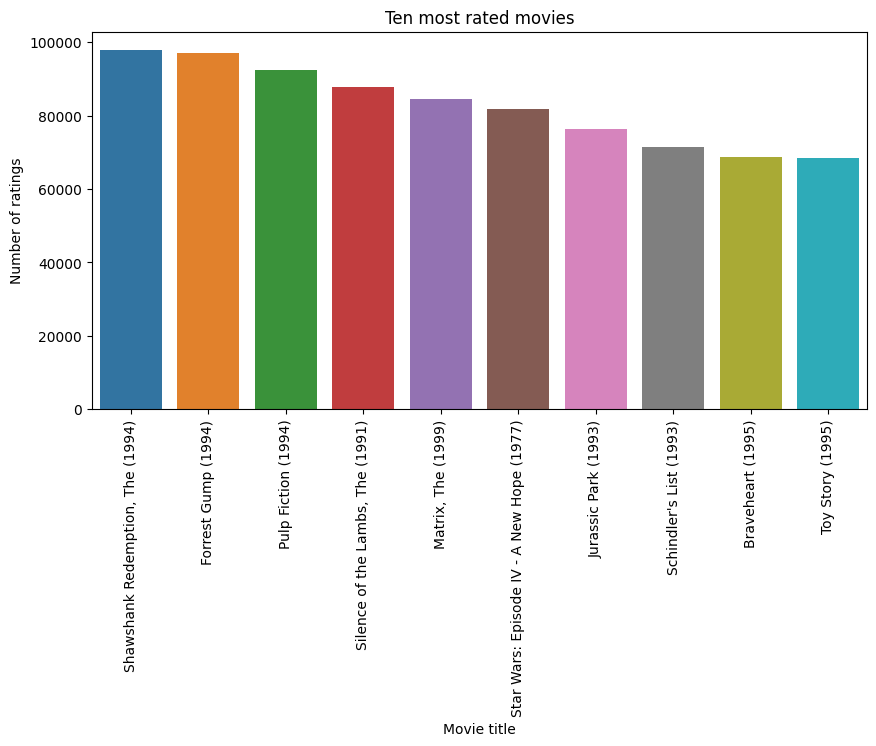

In [56]:
## Code insperation taken from https://datatofish.com/count-duplicates-pandas/
df_ratings_pivot = df_ratings.pivot_table(columns=["movieId"], aggfunc="size").to_frame() ## Creats a pivoted table where the amount of occurances of all movieIds are added
df_ratings_pivot = df_ratings_pivot.reset_index()
df_ratings_pivot = df_ratings_pivot.rename({0: "Number of ratings"}, axis = "columns")
df_ratings_pivot = df_ratings_pivot.sort_values(ascending = False, by = "Number of ratings")
ten_most_rated_movieId = df_ratings_pivot["movieId"].head(10).to_list() ## Takes out the top 10 movies and makes a list of them
ten_most_rated_movies = df_movies[df_movies["movieId"].isin(ten_most_rated_movieId)] ## Takes out the top 10 most populare movies
most_rated_movies = pd.concat([df_ratings_pivot["Number of ratings"].head(10), ten_most_rated_movies["title"]], axis=1) ## Creats a new data frame with the ten most popular movies and thier titles 
plt.figure(figsize=(10,5), dpi=100)
top_10_movies = sns.barplot(data = most_rated_movies, x="title", y="Number of ratings")
top_10_movies.set(title = "Ten most rated movies", xlabel="Movie title")
plt.xticks(rotation=90)
plt.show()

### Mean rating on the 10 most rated movies

In [57]:
movieId_index = 0
mean_rating_list = []

for _ in ten_most_rated_movieId:
    specifed_movie = df_ratings[ # Takes out one movie from a give list and df in this case the one of the ten_most_rated_movies
    df_ratings["movieId"].isin([ten_most_rated_movieId[movieId_index]])
    ]

    rating_count = ( ## Takes out the amout of total entries in specified movie
        specifed_movie.pivot_table(columns=["movieId"], aggfunc="size")
        .to_frame()
        .reset_index()
        .rename({0: "number_of_entries"}, axis="columns")
    )

    total_rating = specifed_movie["rating"].sum() ## Calulates the total amount of ratings
    rating_count = rating_count["number_of_entries"].to_list()
    mean_rating = total_rating/ rating_count[0]
    mean_rating_list.append(mean_rating)

    movieId_index += 1

most_rated_movies["movieId"] = ten_most_rated_movieId
most_rated_movies["mean_rating"] = mean_rating_list

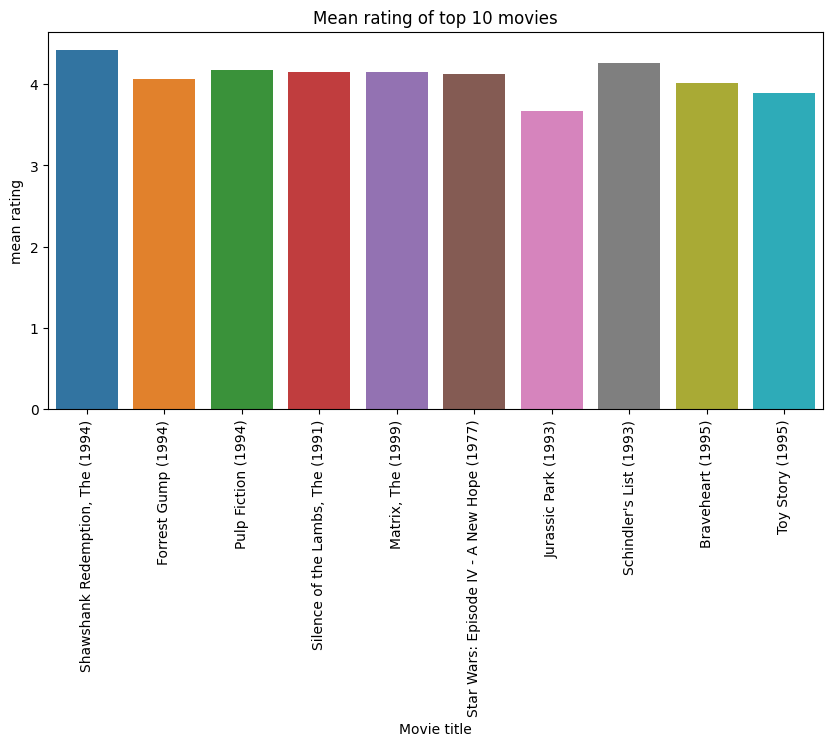

In [58]:
plt.figure(figsize=(10,5), dpi=100)
top_ten_mean_rating = sns.barplot(data = most_rated_movies, x="title", y="mean_rating")
top_ten_mean_rating.set(title="Mean rating of top 10 movies", xlabel="Movie title", ylabel="mean rating")
plt.xticks(rotation=90)
plt.show()

### Plot for movies per year

In [59]:
list_of_year = ["187", "188", "189", "190", "191", "192", "193", "194", "195", "196", "197", "198", "199", "200", "201"] ## List of decades

## Taken from https://datascienceparichay.com/article/pandas-search-for-string-in-dataframe-column/
for i, char in enumerate(list_of_year):
    movies_per_year = df_movies[df_movies["title"].str.contains(f"\({list_of_year[i]}")] ## Checks which year a movie comes from
    movies_per_year["Decade"] = char + "0" ## Asigns a decad to the every movie
    if i == 0:
        movies_with_years = pd.DataFrame(movies_per_year)
    else:
        movies_with_years = pd.concat([movies_with_years, movies_per_year], axis=0)


movies_with_years = movies_with_years.reset_index(drop=True)
df_decades = movies_with_years.pivot_table(columns=["Decade"], aggfunc="size").to_frame() ## Calculates how many movies there are from each decad
df_decades = df_decades.reset_index().rename({0: "Occurance_in_data"}, axis = 1)

C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_6532\2111917770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_per_year["Decade"] = char + "0" ## Asigns a decad to the every movie
C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_6532\2111917770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_per_year["Decade"] = char + "0" ## Asigns a decad to the every movie
C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_6532\2111917770.py:6: SettingWithCopyWarning: 


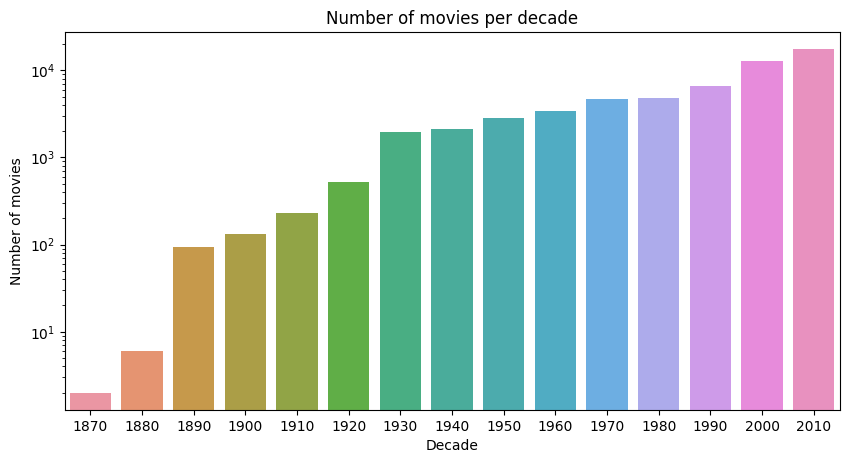

In [60]:
plt.figure(figsize=(10,5), dpi=100)
decade_plot = sns.barplot(data = df_decades, x="Decade", y="Occurance_in_data")
decade_plot.set(yscale="log", title="Number of movies per decade", ylabel="Number of movies")
plt.show()

### Number ratings on movieId

<AxesSubplot:xlabel='movieId', ylabel='Number of ratings'>

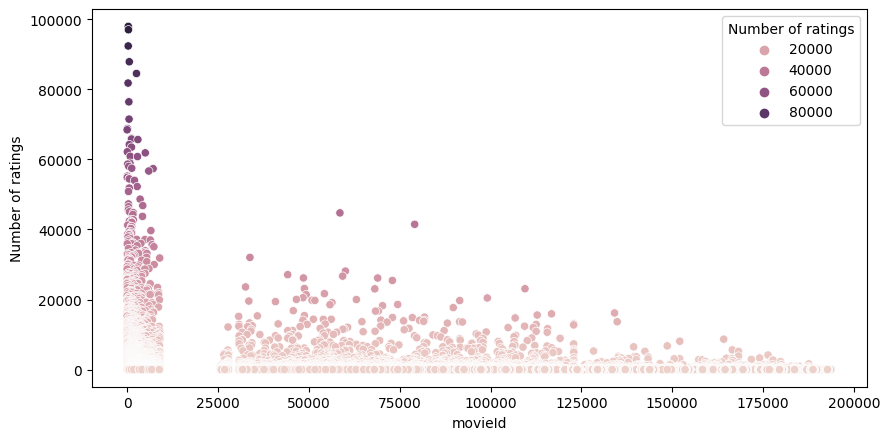

In [61]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data = df_ratings_pivot, x="movieId", y="Number of ratings", hue = "Number of ratings")

## Sparse matrix

### Cleaning the data

In [62]:
low_ratings = 0
movieId_index = 0
list_mean_rating = []

df_ratings_per_movie = (
    df_ratings.pivot_table(columns=["movieId"], aggfunc="size")
    .to_frame()
    .reset_index()
    .rename({0: "number_of_ratings"}, axis=1)
    .sort_values(by="number_of_ratings", ascending=True)
)

for i in range(1001):
    low_ratings_movies = df_ratings_per_movie[df_ratings_per_movie["number_of_ratings"].isin([low_ratings])]
    
    if low_ratings == 0:
        df_low_ratings_movies = pd.DataFrame(low_ratings_movies)
        low_ratings +=1
    else:
        df_low_ratings_movies = pd.concat([df_low_ratings_movies, low_ratings_movies], axis=0)
        low_ratings += 1

movies_to_drop_list = df_low_ratings_movies["movieId"].to_list()
df_movies_to_drop = df_ratings[df_ratings["movieId"].isin(movies_to_drop_list)].reset_index().rename({"index": "index_to_drop"}, axis = 1)
df_movie_index_to_drop = df_movies_to_drop["index_to_drop"].to_list()

df_ratings_cleaned = df_ratings.drop(df_movie_index_to_drop)

In [63]:
df_ratings_cleaned_movieId_pivot = df_ratings_cleaned.pivot_table(columns=["movieId"], aggfunc="size").to_frame().reset_index().rename({0: "data_occurance"}, axis=1)
movie_index = 0
list_mean_rating = []

for _ in range(len(df_ratings_cleaned_movieId_pivot)):
    movie_specified = df_ratings_cleaned_movieId_pivot.iloc[movie_index].to_list()
    specifiec_movie = df_ratings_cleaned[df_ratings_cleaned["movieId"].isin([movie_specified[0]])]
    rating_count = specifed_movie["rating"].sum()
    mean_rating = rating_count/movie_specified[1]
    list_mean_rating.append(mean_rating)
    movie_index += 1


In [64]:
df_ratings_cleaned_movieId_pivot["mean_rating"] = list_mean_rating

In [65]:
movie_index = 0
movie_list = []
for _ in range(len(df_ratings_cleaned_movieId_pivot)):
    movie_specified = df_ratings_cleaned_movieId_pivot.iloc[movie_index].to_list()
    movie_mean_rating = movie_specified[2]
    movieId = movie_specified[0] ## Takes out a specific movieId
    if movie_mean_rating <= 3:
        movie_list.append(movieId)
        movieId_index += 1
    else:
        movieId_index += 1
    movie_index += 1

In [66]:
df_movies_to_remove = df_ratings_cleaned[df_ratings_cleaned["movieId"].isin(movie_list)].reset_index().rename({"index": "index_to_drop"}, axis = 1)
list_index_to_drop = df_movies_to_remove["index_to_drop"].to_list()
df_ratings_cleand = df_ratings_cleaned.drop(list_index_to_drop).reset_index(drop=True)

In [67]:
df_ratings_cleand

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
24614124,283228,8228,5.0
24614125,283228,8542,4.5
24614126,283228,34405,4.5
24614127,283228,44761,4.5


### Pivot matrix

In [68]:
movies_users = df_ratings_cleaned.pivot(index="movieId", columns="userId", values = "rating").fillna(0)
movies_users

MemoryError: Unable to allocate 4.14 GiB for an array with shape (282715, 3929) and data type float32

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

C:\Users\FabianAndersson-AIU2\.virtualenvs\Machinelearning-Fabian-Andersson-w7oPBvBJ\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
mat_movies_users = csr_matrix(movies_users.values)

In [ ]:
model_KNN = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20)
model_KNN.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [ ]:
def recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    idx = process.extractOne(movie_name, df_movies["title"])[2]
    print("Movie Selected: ", df_movies["title"][idx], "Index: ", idx)
    print("Searching for recommendetions...")
    distance, indecies = model.kneighbors(data[idx], n_neighbors = n_recommendations)
    for i in indecies:
        print(df_movies["title"][i].where(i!=idx))

recommender("iron man", mat_movies_users, model_KNN, 20)

Movie Selected:  Iron Man (2008) Index:  12666
Searching for recommendetions...


IndexError: row index (12666) out of range